# Analysis of FIFA official matches from 2018 to 2022

**Final Report**

ISYS 812 Programming and Applications for Data Analytics


Professor: Guillaume Faddoul

Group members: 

* Renato Perez

* Punit Mestha

**Importing libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

**Loading data set**

In [2]:
df_fifa = pd.read_csv("./src/fifawc2022/international_matches.csv",
                      parse_dates=["date"], encoding="utf-8")
df_fifa.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [389]:
df_fifa.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [443]:
round(df_fifa.isnull().mean()*100, 2)

date                              0.00
home_team                         0.00
away_team                         0.00
home_team_continent               0.00
away_team_continent               0.00
home_team_fifa_rank               0.00
away_team_fifa_rank               0.00
home_team_total_fifa_points       0.00
away_team_total_fifa_points       0.00
home_team_score                   0.00
away_team_score                   0.00
tournament                        0.00
city                              0.00
country                           0.00
neutral_location                  0.00
shoot_out                         0.00
home_team_result                  0.00
home_team_goalkeeper_score       64.97
away_team_goalkeeper_score       66.16
home_team_mean_defense_score     67.45
home_team_mean_offense_score     64.42
home_team_mean_midfield_score    65.88
away_team_mean_defense_score     68.38
away_team_mean_offense_score     65.25
away_team_mean_midfield_score    66.64
dtype: float64

# Data Analysis Questions

## 1. How many tournaments have been played in each continent?

An overview of the international competitions from around the world that have taken place between the previous World Cup and the current one.

**Data Cleaning**

In [3]:
post_2018 = df_fifa[(df_fifa["date"].dt.year >= 2019)]

prev_comp = post_2018[["tournament", "home_team_continent"]]
prev_comp = prev_comp[~prev_comp["tournament"]
                      .isin(["Friendly", "Superclásico de las Américas", "FIFA World Cup qualification"])]

competitions = pd.read_excel("./src/fifawc2022/Tournaments_Continents_Key.xlsx")
comp_cont = competitions.groupby(["tournament_continent"]).count().reset_index()
comp_cont.columns = ["Continent", "Count"]

comp_cont["Pct"] = round(comp_cont["Count"] / comp_cont["Count"].sum(), 2)
comp_cont

,Continent,Count,Pct
0,Africa,7,0.25
1,Asia,11,0.39
2,Europe,4,0.14
3,North America,4,0.14
4,Oceania,1,0.04
5,South America,1,0.04


**Plot**

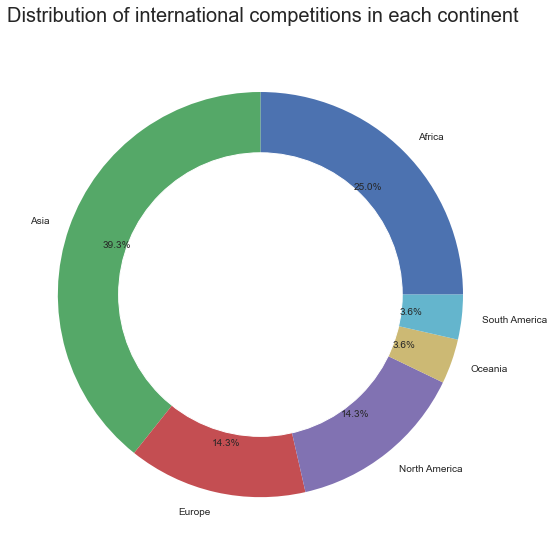

In [4]:
# Create a circle at the center of the plot
my_circle = plt.Circle((0, 0), 0.7, color='#fff')

fig = plt.figure(figsize=(10, 8))
plt.style.use("seaborn")
plt.pie(comp_cont["Count"], labels=comp_cont["Continent"],
        autopct="%.1f%%", pctdistance=0.75)

# aesthetics
plt.rcParams.update({"font.size": 16})

# adding inner circle to make the pie chart a donut
p = plt.gcf()
p.gca().add_artist(my_circle)

# titles and labels
plt.title("Distribution of international competitions in each continent",
          fontsize=20, pad=20, loc="left")

plt.tight_layout()

plt.show()

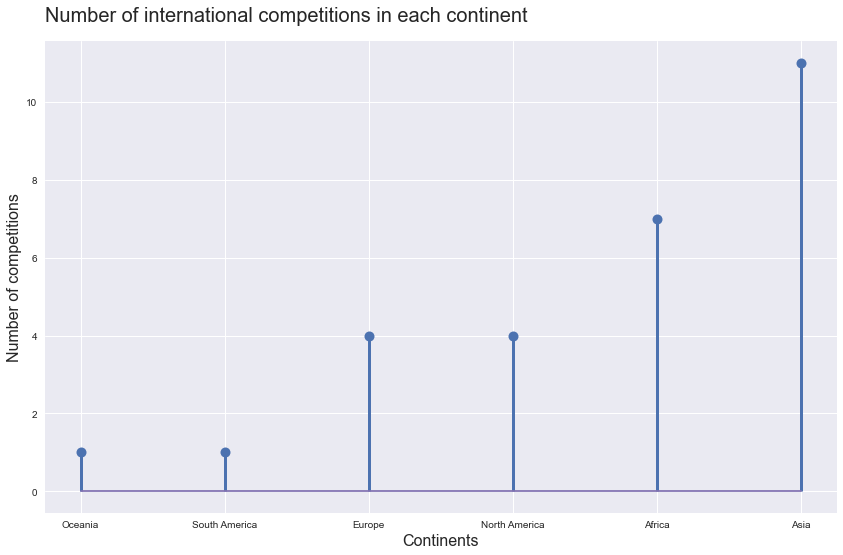

In [5]:
lollipop = comp_cont.sort_values("Count")
lolli_range = range(0, len(lollipop["Continent"]))

fig = plt.figure(figsize=(12, 8))
plt.xticks(lolli_range, lollipop["Continent"])

# stem and marker styles
markerline, stemlines, baseline = plt.stem(lollipop["Count"])
plt.setp(stemlines, "linewidth", 3)
plt.setp(markerline, "markersize", 10)

plt.title("Number of international competitions in each continent",
          fontsize=20, pad=20, loc="left")
plt.xlabel('Continents', fontsize=16)
plt.ylabel('Number of competitions', fontsize=16)

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.tight_layout()

plt.show()

## 2. How many goals were scored in each major continental tournament?

Getting data from all major continental tournaments previous to the oncoming World Cup

**Data cleaning**

In [6]:
uefa_euro = df_fifa[((df_fifa["tournament"] == "UEFA Euro")
                    & (df_fifa["date"].dt.year == 2021))]

copa_america = df_fifa[((df_fifa["tournament"] == "Copa América") 
                    & (df_fifa["date"].dt.year == 2021))]

gold_cup = df_fifa[((df_fifa["tournament"] == "Gold Cup")
                    & (df_fifa["date"].dt.year == 2021))]

african_cup = df_fifa[((df_fifa["tournament"] == "African Cup of Nations")
                    & (df_fifa["date"].dt.year == 2022))]

asian_cup = df_fifa[((df_fifa["tournament"] == "AFC Asian Cup")
                    & (df_fifa["date"].dt.year == 2019))]

uefa_euro = uefa_euro.assign(continent="Europe")
copa_america = copa_america.assign(continent="South America")
gold_cup = gold_cup.assign(continent="North America")
african_cup = african_cup.assign(continent="Africa")
asian_cup = asian_cup.assign(continent="Asia")

lst_trmnts = [uefa_euro, copa_america, gold_cup, african_cup, asian_cup]

In [14]:
def sum_goals(dataset):
    return dataset[["home_team_score", "away_team_score"]].sum().sum()


# Getting total goals for each tournament
tournaments_df = [uefa_euro, copa_america, asian_cup, african_cup, gold_cup]
last_trmnts = []
for trmnt in tournaments_df:
    temp = {}
    temp["continent"] = trmnt["continent"].iloc[0]
    temp["n_goals"] = sum_goals(trmnt)
    last_trmnts.append(temp)

last_trmnts = pd.DataFrame(last_trmnts)
last_trmnts


,continent,n_goals
0,Europe,142
1,South America,65
2,Asia,130
3,Africa,100
4,North America,64


**Plot**

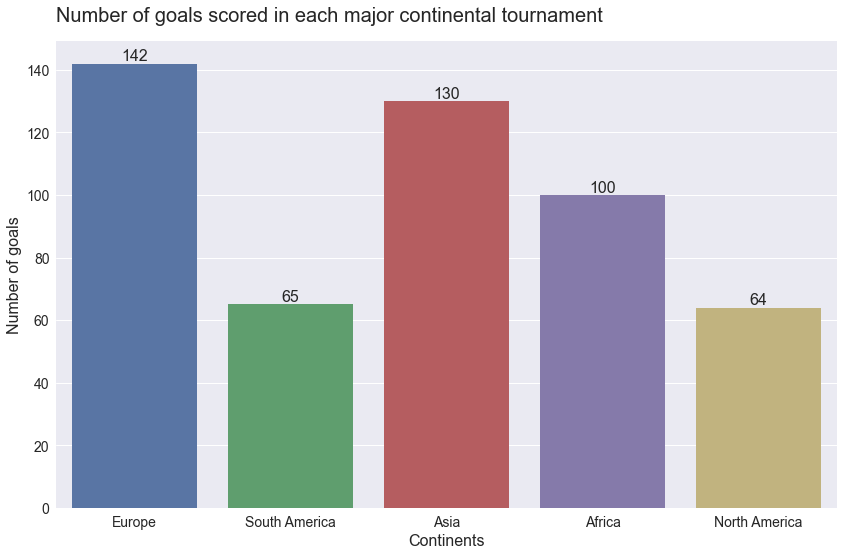

In [15]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(
    x="continent",
    y="n_goals",
    data=last_trmnts
)

ax.bar_label(ax.containers[0])
plt.title("Number of goals scored in each major continental tournament",
          fontsize=20, pad=20, loc="left")
plt.xlabel("Continents", fontsize=16)
plt.ylabel("Number of goals", fontsize=16)

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.tight_layout()

plt.show()


## 3. How do position scores compare between continents and the top 5 strongest teams?

**Data cleaning**

In [16]:
def get_stats(trmnt):
    home_stats = trmnt[["home_team", "home_team_mean_offense_score", "home_team_mean_midfield_score",
                        "home_team_mean_defense_score", "home_team_goalkeeper_score", "continent"]]
    away_stats = trmnt[["away_team", "away_team_mean_offense_score", "away_team_mean_midfield_score",
                        "away_team_mean_defense_score", "away_team_goalkeeper_score", "continent"]]
    return concat_stats(home_stats, away_stats)


def concat_stats(home_stats, away_stats):
    home_stats.columns = ["team", "offense", "midfield",
                          "defense", "goalkeeper", "continent"]
    away_stats.columns = ["team", "offense", "midfield",
                          "defense", "goalkeeper", "continent"]
    return pd.concat([home_stats, away_stats]).drop_duplicates().reset_index(drop=True)


lst = []
lst_trmnts = [uefa_euro, copa_america, gold_cup, african_cup, asian_cup]
for trmnt in lst_trmnts:
    lst.append(get_stats(trmnt))

cont_stats = pd.concat(lst).reset_index(drop=True)

cont_stats = cont_stats.groupby("continent").mean().reset_index()

cont_stats.head()


,continent,offense,midfield,defense,goalkeeper
0,Africa,74.883333,74.105882,72.800000,71.545455
1,Asia,70.787500,71.444444,70.600000,71.666667
2,Europe,78.475000,80.370833,78.920833,81.666667
3,North America,73.800000,70.800000,71.828571,74.285714
4,South America,78.430000,78.290000,76.990000,77.300000


In [411]:
def get_stats_top(trmnt):
    trmnt = trmnt[trmnt["date"].dt.year >= 2019]
    home_stats = trmnt[["home_team", "home_team_mean_offense_score", "home_team_mean_midfield_score",
                        "home_team_mean_defense_score", "home_team_goalkeeper_score"]]
    away_stats = trmnt[["away_team", "away_team_mean_offense_score", "away_team_mean_midfield_score",
                        "away_team_mean_defense_score", "away_team_goalkeeper_score"]]
    return concat_stats_top(home_stats, away_stats)


def concat_stats_top(home_stats, away_stats):
    home_stats.columns = ["team", "offense", "midfield",
                          "defense", "goalkeeper"]
    away_stats.columns = ["team", "offense", "midfield",
                          "defense", "goalkeeper"]
    return pd.concat([home_stats, away_stats]).drop_duplicates().reset_index(drop=True)

In [423]:
top_5_lst = ['Brazil', 'Belgium', 'France', 'Argentina', 'England']

df = get_stats_top(df_fifa)
df = df[df["team"].isin(top_5_lst)]

df = df.groupby("team").mean().reset_index()
df

,team,offense,midfield,defense,goalkeeper
0,Argentina,89.900,83.675,81.675,82.00
1,Belgium,86.925,85.500,82.400,89.00
2,Brazil,87.400,85.975,85.600,88.50
3,England,87.000,83.250,83.750,82.75
4,France,86.100,87.700,85.075,87.50


**Plot**

In [431]:
def plot_radar(df, category, title, ylim, yticks):
    # ------- Create background

    # number of variables
    categories = list(df)[1:]
    N = len(categories)

    # angle of each axis in the plot (plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # initializing the spider plot
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(111, polar=True)

    # first axis on top
    ax.set_theta_offset(pi/2)
    ax.set_theta_direction(-1)

    # drawing one axe per variable + adding labels
    plt.xticks(angles[:-1], categories)

    # drawing ylables
    ax.set_rlabel_position(0)
    plt.yticks(yticks, color="gray")
    plt.ylim(ylim)

    # ------- Add plots

    # Plot each individual = each line of the data

    for i in range(0, len(df)):
        values = df.loc[i].drop(category).values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, "o",
                linewidth=4,
                linestyle='solid',
                label=df[category].loc[i],
                alpha=0.7,
                markersize=8)
        ax.scatter(angles, values, s=20)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Add title
    plt.title(title, fontsize=20, pad=20, loc="left")

    plt.tight_layout()

    plt.show()


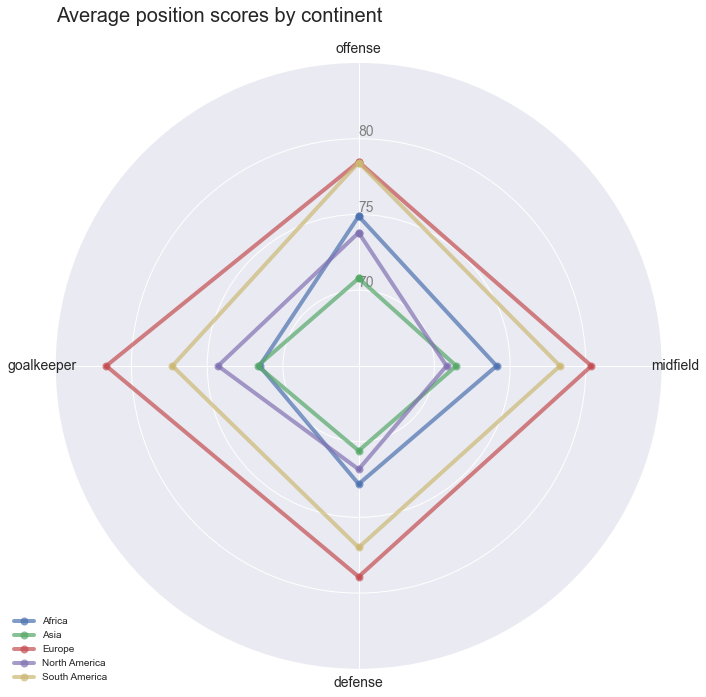

In [432]:
plot_radar(cont_stats, "continent", "Average position scores by continent", ylim=(65, 85), yticks=[70, 75, 80])

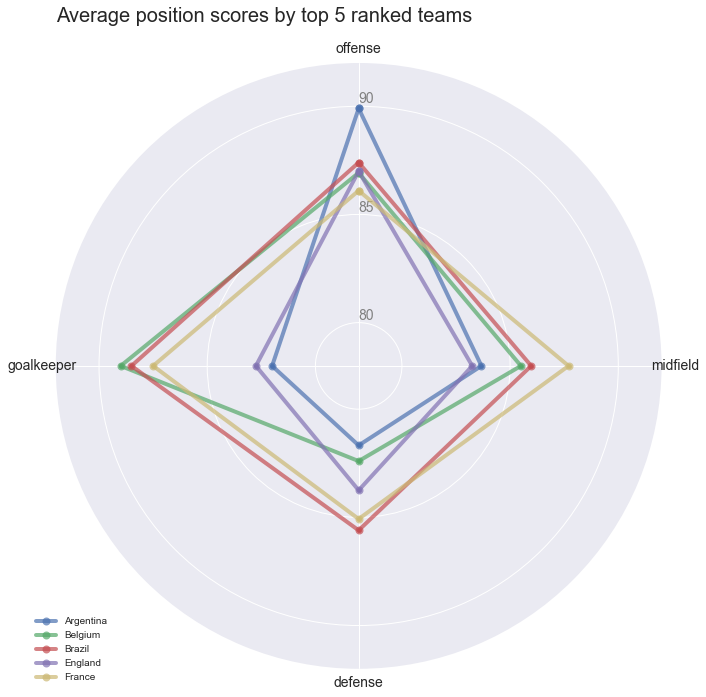

In [440]:
plot_radar(df, "team", "Average position scores by top 5 ranked teams", ylim=(78, 92), yticks=[80, 85, 90])

## 4. How has the FIFA Ranking changed since the last World Cup?

**Data cleaning**

In [19]:
# re-shaping the data
fifa_rank = df_fifa[['date', 'home_team', 'away_team',
                     'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team', 'home_team_fifa_rank']]\
    .rename(columns={'home_team': 'team', 'home_team_fifa_rank': 'rank'})
away = fifa_rank[['date', 'away_team', 'away_team_fifa_rank']]\
    .rename(columns={'away_team': 'team', 'away_team_fifa_rank': 'rank'})
fifa_rank = home.append(away)

# select for each country the latest match
fifa_rank = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])

# get the ranking for each year
fifa_rank["year"] = fifa_rank["date"].dt.year
fifa_rank['row_number'] = fifa_rank.groupby(['team', "year"]).cumcount()+1
fifa_rank = fifa_rank[fifa_rank['row_number'] == 1].drop('row_number', axis=1)
fifa_rank = fifa_rank.sort_values(["year", "rank"], ascending=[False, True])

fr_2021 = fifa_rank.loc[fifa_rank["year"] == 2021, "rank"]
fr_2021 = fr_2021.apply(lambda x: x-1 if x > 9 else x)
fifa_rank.loc[fifa_rank["year"] == 2021, "rank"] = fr_2021

# select the top 20 strongest teams for each year -> BUT ONLY 10 WILL BE SHOWED
fifa_rank_top_10 = fifa_rank.groupby("year")\
    .apply(lambda x: x.nsmallest(20, 'rank')).reset_index(drop=True)
fifa_rank_top_10

# select ranking for the last 5 years
years_range = range(2022-4, 2022+1)
fifa_rank_top_10 = fifa_rank_top_10[fifa_rank_top_10["year"]\
                                    .isin(years_range)].drop("date", axis=1)
fifa_rank_top_10


,team,rank,year
500,Belgium,1,2018
501,France,2,2018
502,Brazil,3,2018
503,Croatia,4,2018
504,England,5,2018
...,...,...,...
595,Croatia,16,2022
596,Colombia,17,2022
597,Wales,18,2022
598,Sweden,19,2022


In [20]:
# Get the n top ranked of last edition (for labeling)
n_top_ranked = 10
top_teams = fifa_rank_top_10[fifa_rank_top_10["year"] == fifa_rank_top_10["year"].max()].\
                nsmallest(n_top_ranked, "rank")
top_teams

,team,rank,year
580,Brazil,1,2022
581,Belgium,2,2022
582,France,3,2022
583,Argentina,4,2022
584,England,5,2022
585,Italy,6,2022
586,Spain,7,2022
587,Portugal,8,2022
588,Mexico,9,2022
589,Netherlands,10,2022


**Plot**

In [21]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


def get_flag(name):
    path = "./src/fifawc2022/flags/{}.png".format(name)
    im = plt.imread(path)
    return im


def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.05)
    im.image.axes = ax

    ab = AnnotationBbox(im, (0, coord+1),  xybox=(24, -1.7), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)


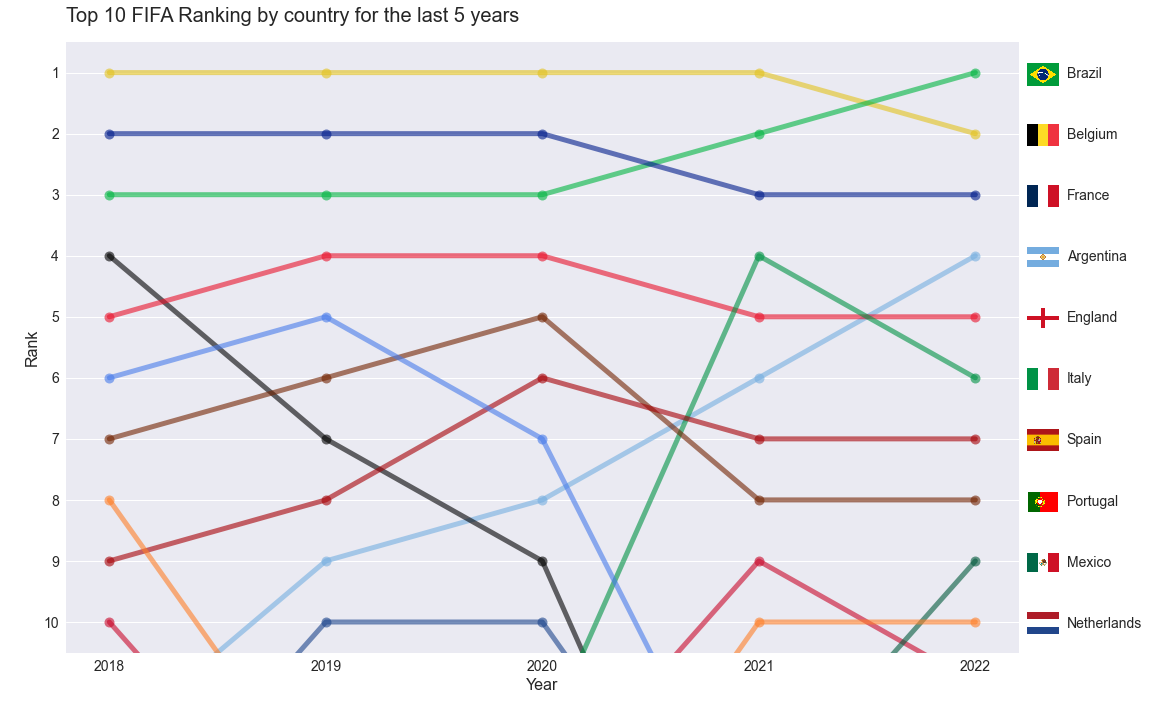

In [22]:
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

COLOR_SCALE = [
    "#75AEE0",  # ARG
    "#e3c21d",  # BEL
    "#00b540",  # BRA
    "#1B448C",  # CHI # wont show
    "#1B448C",  # COL # wont show
    "#000000",  # CRO # wont show
    "#C9082A",  # DEN
    "#e9122b",  # ENG
    "#001c8b",  # FRA
    "#848484",  # GER # wont show
    "#009344",  # ITA
    "#01593b",  # MEX
    "#FF7F27",  # NET
    "#1B448C",  # PER # wont show
    "#1B448C",  # POL # wont show
    "#722200",  # POR
    "#1B448C",  # SEN # wont show
    "#a60005",  # SPA
    "#1B448C",  # SWE # wont show
    "#FF7F27",  # SWI
    "#1B448C",  # USA # wont show
    "#477beb",  # URU
    "#1B448C",  # WAL # wont show
]

# fig, ax = plt.subplots(figsize=(12, 6))
fig, ax = plt.subplots(figsize=(16, 10),
                       subplot_kw=dict(ylim=(0.5, 0.5 + n_top_ranked)))

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))

# secondary axis with country names
yax2 = ax.secondary_yaxis("right")
yax2.yaxis.set_major_locator(FixedLocator(top_teams["rank"].to_list()))
yax2.yaxis.set_major_formatter(FixedFormatter(top_teams["team"].to_list()))
yax2.tick_params(pad=48)

# plotting
idx = 0
for i, j in fifa_rank_top_10.groupby("team"):
    color = COLOR_SCALE[idx]
    plt.plot("year",
             "rank",
             "o-",
             data=j,
             color=color,
             markersize=10,
             alpha=0.6,
             linewidth=5)
    idx += 1

# titles and aesthetics
ax.grid(axis="x")
ax.invert_yaxis()
ax.set_title("Top 10 FIFA Ranking by country for the last 5 years",
             fontsize=20, pad=20, loc="left")
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Rank", fontsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.tight_layout()
# fig.patch.set_facecolor("#f2f2f6")

# displaying country flags
countries = ['Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Italy', 'Spain', 'Portugal', 'Mexico', 'Netherlands', 'Chile',
             'Colombia', 'Croatia', 'Denmark', 'Germany', 'Peru', 'Poland', 'Senegal', 'Sweden', 'Switzerland', 'USA', 'Uruguay', 'Wales']
countries = [c.lower() for c in countries]

for i, c in enumerate(countries):
    offset_image(i, c, yax2)

plt.show()


## 5. How many wins, draws, and losses have the top 5 ranked teams had in the last 4 years?

In [210]:
def invert_result_away(result):
    if result == "Win":
        return "Lose"
    elif result == "Lose":
        return "Win"
    else:
        return result
    
def get_top(df):
    df = df[(df["date"].dt.year >= 2019)]
    return df[["home_team", "away_team", "home_team_result",]]
    
def count_results(df, location):
    columns_groupby = ["{}_team".format(location), "home_team_result"]
    df = df.groupby(columns_groupby).count().reset_index()
    df.columns = ["team", "result", "count"]
    return df.sort_values(["team", "result"])

In [246]:
# top_teams is the variable containing the top 10 ranked teams (from previous question)
# it only has the columns team, rank and year
# so we will have to use the team columns to filter the fifa dataframe
# and get the necessary columns to answer this question

top_5_lst = list(top_teams["team"][0:5]) # -> ['Brazil', 'Belgium', 'France', 'Argentina', 'England']

# getting rows where home_team and away_team has the top 5
home_top = df_fifa[df_fifa["home_team"].isin(top_5_lst)]
away_top = df_fifa[df_fifa["away_team"].isin(top_5_lst)]

# getting results when top team is home
home_top = get_top(home_top)
home_top = count_results(home_top, "home")

# getting results when top team is away
# appending Brazil with 0 loses as away because it did not lose as away team
away_top = get_top(away_top)
away_top["home_team_result"] = away_top["home_team_result"].apply(invert_result_away)
away_top = count_results(away_top, "away")

away_top = away_top.append({"team": "Brazil", "result": "Lose", "count": 0}, ignore_index=True)
away_top = away_top.sort_values(["team", "result"]).reset_index(drop=True)
away_top = away_top["count"]

# concatenating home and away while summing count
top_concat = pd.concat([home_top, away_top], axis=1)
top_concat["count"] = top_concat.pop("count").sum(axis=1).astype(int)
top_concat = top_concat.pivot(index="team", columns=["result"], values="count").reset_index()
top_concat


result,team,Draw,Lose,Win
0,Argentina,11,3,27
1,Belgium,6,5,30
2,Brazil,9,3,30
3,England,6,7,30
4,France,9,5,27


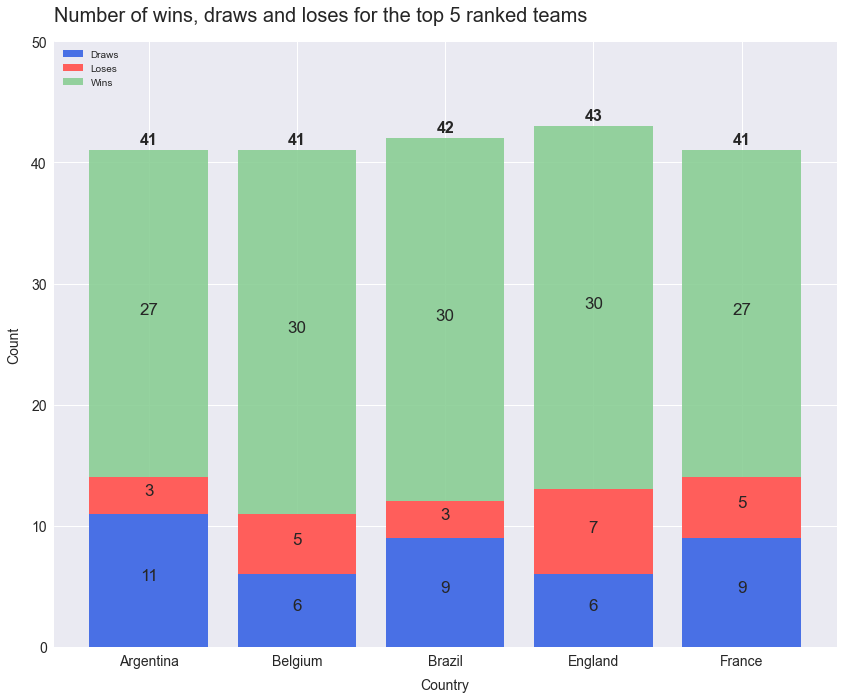

In [388]:
teams = np.array(list(top_concat["team"]))
draws = np.array(list(top_concat["Draw"]))
loses = np.array(list(top_concat["Lose"]))
wins = np.array(list(top_concat["Win"]))

# bar axes
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_ylim(top=50)

# bars
ax.bar(teams, draws, color="#4970E5")
ax.bar(teams, loses, bottom=draws, color="#FF5E5B")
ax.bar(teams, wins, bottom=draws+loses, color="#89CE94E5")

# data labels
totals = top_concat.drop("team", axis=1).sum(axis=1)
for i, total in enumerate(totals):
    ax.text(
        totals.index[i],
        total + 0.5,
        round(total),
        ha="center",
        weight="bold"
    )
    
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height()/2 + bar.get_y() ,
        round(bar.get_height()),
        ha="center",
        size=17
    )

# legend
ax.legend(["Draws", "Loses", "Wins"], loc="upper left")

# aesthetics
plt.title("Number of wins, draws and loses for the top 5 ranked teams",
         fontsize=20, pad=20, loc="left")
plt.xlabel("Country", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)

plt.tight_layout()
plt.show()